In [76]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error



import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL, _extrapolate_trend
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [78]:
gdp = pd.read_csv('./data/RealGDP.csv')
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
gdp.set_index('DATE', inplace=True)
gdp.rename(columns={'A191RL1Q225SBEA': 'RealGDP'}, inplace=True)
gdp.head(5)

,RealGDP
DATE,
1947-04-01,-1.0
1947-07-01,-0.8
1947-10-01,6.4
1948-01-01,6.2
1948-04-01,6.8


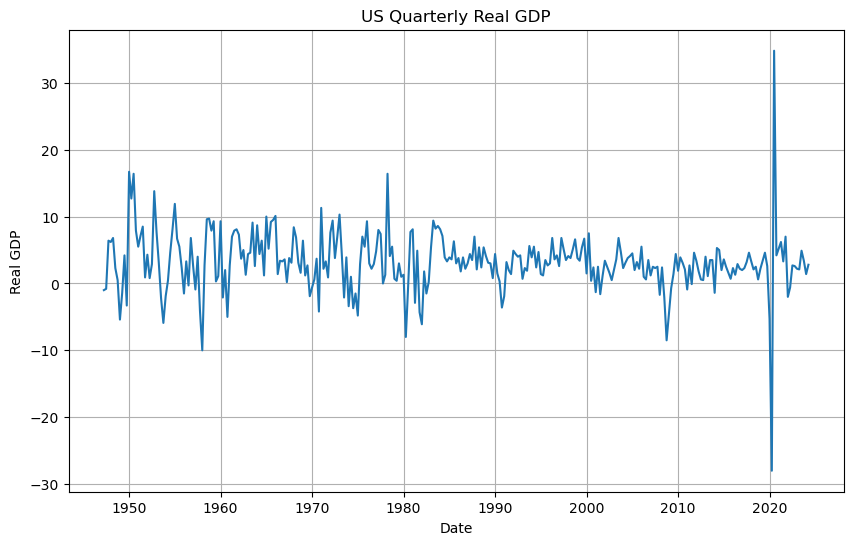

In [80]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(gdp.index, gdp['RealGDP'])
plt.title('US Quarterly Real GDP')
plt.xlabel('Date')
plt.ylabel('Real GDP')
plt.grid(True)
plt.show()

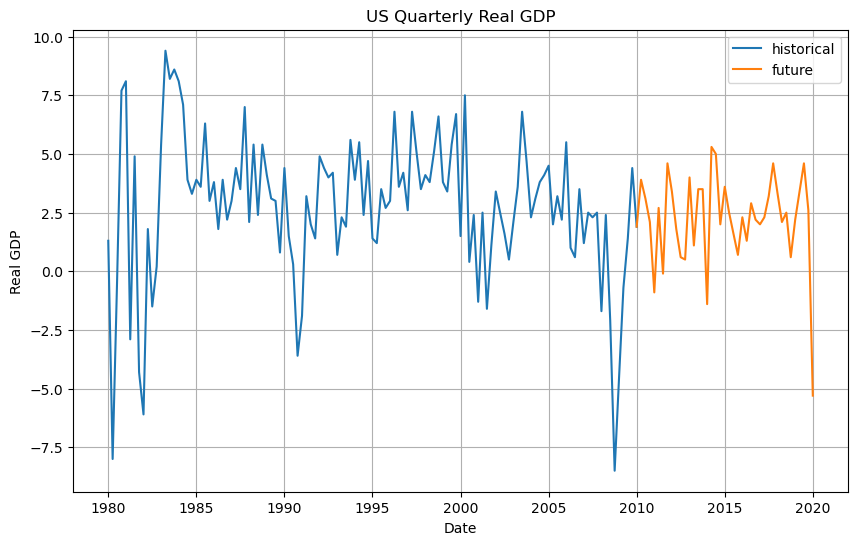

In [133]:
y_hist = gdp['1980-01-01':'2010-01-01']
y_future = gdp['2010-01-01':'2020-01-01']

# Plotting the line chart
plt.figure(figsize=(10, 6))
# plt.plot(y_train.index, y_train['RealGDP'])
plt.plot(y_hist, label = 'historical')
plt.plot(y_future, label = 'future')
plt.legend()
plt.title('US Quarterly Real GDP')
plt.xlabel('Date')
plt.ylabel('Real GDP')
plt.grid(True)
plt.show()

In [84]:
period = 30
decomposition = seasonal_decompose(y_hist['RealGDP'], model='additive', period=period)

# Extract the trend and seasonality components
trend = decomposition.trend
trend = _extrapolate_trend(trend, period+1)

seasonality = decomposition.seasonal

print(trend)
print(seasonality)

DATE
1980-01-01    4.464590
1980-04-01    4.428062
1980-07-01    4.391535
1980-10-01    4.355007
1981-01-01    4.318480
                ...   
2009-01-01    1.310655
2009-04-01    1.252726
2009-07-01    1.194797
2009-10-01    1.136868
2010-01-01    1.078940
Name: trend, Length: 121, dtype: float64
DATE
1980-01-01   -1.397620
1980-04-01   -0.580398
1980-07-01   -0.852065
1980-10-01    0.516269
1981-01-01    0.702380
                ...   
2009-01-01   -1.664287
2009-04-01   -0.795398
2009-07-01   -0.743176
2009-10-01    0.245157
2010-01-01   -1.397620
Name: seasonal, Length: 121, dtype: float64


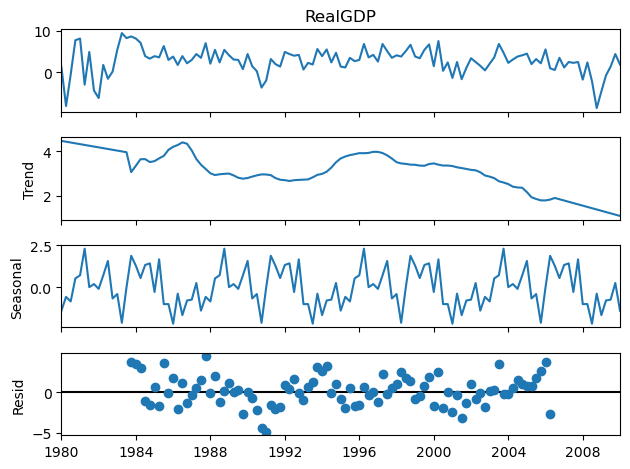

In [86]:
#Plot the results
decomposition.plot()
plt.show()

### Forecasting With ARIMA

In [111]:
stlf = STLForecast(y_hist['RealGDP'], ARIMA)
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(len(y_future))

/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


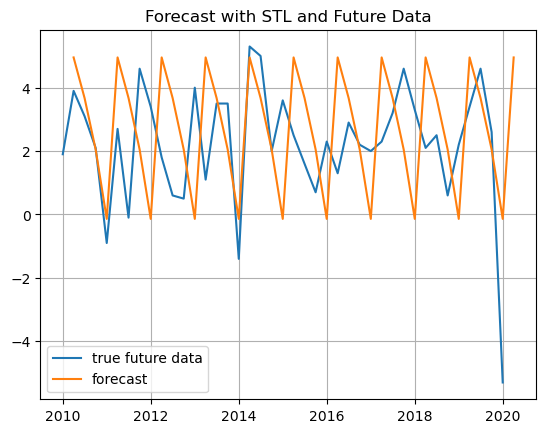

In [113]:
plt.plot(y_future, label = 'true future data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

In [119]:
pred_error = y_future['RealGDP'] - forecast
mae = pred_error.abs().sum()/len(pred_error)

pred_error_squared = pred_error ** 2
rmse = np.sqrt(pred_error_squared.sum()/len(pred_error))

# # Answer check
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 1.8768656909512829
RMSE: 2.305694713294389


### Forecasting with SARIMAX

In [121]:
stlf = STLForecast(y_hist['RealGDP'], SARIMAX, model_kwargs={"order": (1, 1, 1), "seasonal_order": (1, 1, 1, 4)})
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(len(y_future))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42988D+00    |proj g|=  1.44010D-01

At iterate    5    f=  2.23032D+00    |proj g|=  1.36219D-02

At iterate   10    f=  2.22989D+00    |proj g|=  4.55548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     17      1     0     0   1.805D-05   2.230D+00
  F =   2.2298864977633452     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


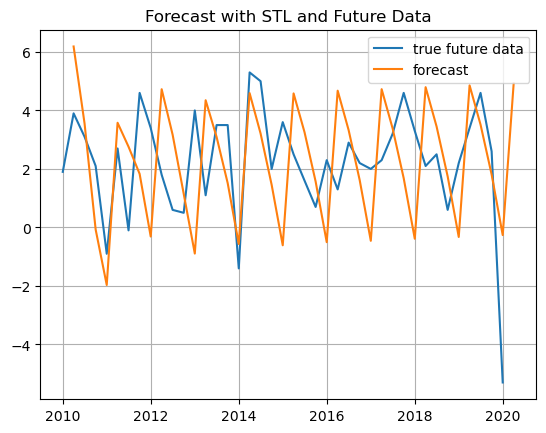

In [123]:
plt.plot(y_future, label = 'true future data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

In [125]:
pred_error = y_future['RealGDP'] - forecast
mae = pred_error.abs().sum()/len(pred_error)

pred_error_squared = pred_error ** 2
rmse = np.sqrt(pred_error_squared.sum()/len(pred_error))

# # Answer check
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 1.907427429472025
RMSE: 2.315019605959879


### Forecasting with ETS

In [127]:
stlf = STLForecast(y_hist['RealGDP'], ExponentialSmoothing)
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(len(y_future))

/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


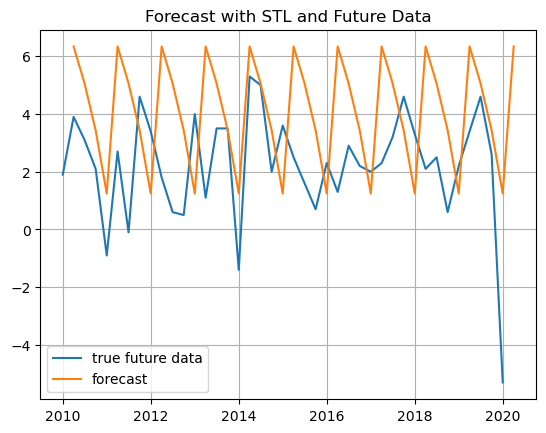

In [129]:
plt.plot(y_future, label = 'true future data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

In [131]:
pred_error = y_future['RealGDP'] - forecast
mae = pred_error.abs().sum()/len(pred_error)

pred_error_squared = pred_error ** 2
rmse = np.sqrt(pred_error_squared.sum()/len(pred_error))

# # Answer check
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 2.3764701518328715
RMSE: 2.85681202925913
